In [1]:
!git clone https://github.com/pawij/amml-2526

fatal: destination path 'amml-2526' already exists and is not an empty directory.


In [2]:
import sys
sys.path.insert(0,'/content/amml-2526/src')

In [3]:
import torch
from model import VariationalAutoencoder

use_gpu = True
device = torch.device("cuda:0" if use_gpu and torch.cuda.is_available() else "cpu")

model0 = VariationalAutoencoder()
model0.load_state_dict(torch.load('/content/amml-2526/data/amml_model0_weights.pth', weights_only=True))
model0 = model0.to(device)
model0.eval()

model1 = VariationalAutoencoder()
model1.load_state_dict(torch.load('/content/amml-2526/data/amml_model1_weights.pth', weights_only=True))
model1 = model1.to(device)
model1.eval()

VariationalAutoencoder(
  (conv1): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (fc_mu): Linear(in_features=6272, out_features=20, bias=True)
  (fc_logvar): Linear(in_features=6272, out_features=20, bias=True)
  (fc_decode): Linear(in_features=20, out_features=6272, bias=True)
  (conv2_decode): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv1_decode): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
)

In [4]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

batch_size = 256

img_transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = MNIST(root='./data/MNIST', download=True, train=True, transform=img_transform)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = MNIST(root='./data/MNIST', download=True, train=False, transform=img_transform)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

Original images


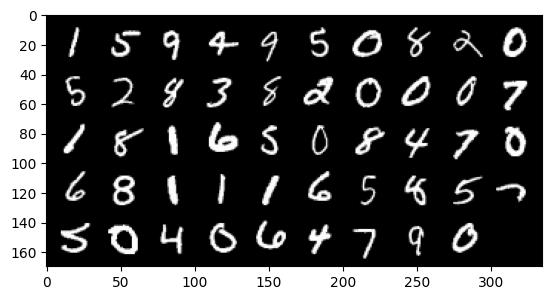

VAE reconstruction for model0:


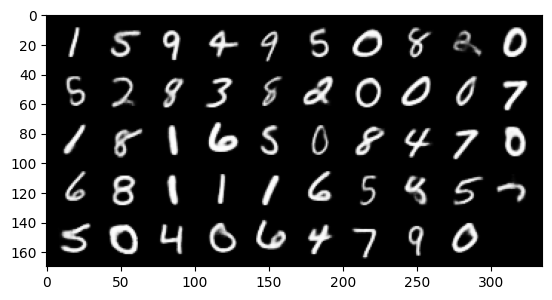

VAE reconstruction for model1:


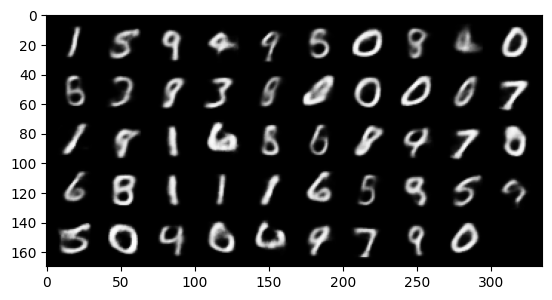

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

import torchvision.utils

# This function takes as an input the images to reconstruct
# and the name of the model with which the reconstructions
# are performed
def to_img(x):
    x = x.clamp(0, 1)
    return x

def show_image(img):
    img = to_img(img)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

def visualise_output(images, model):

    with torch.no_grad():

        images = images.to(device)
        images, _, _ = model(images)
        images = images.cpu()
        images = to_img(images)
        np_imagegrid = torchvision.utils.make_grid(images[1:50], 10, 5).numpy()
        plt.imshow(np.transpose(np_imagegrid, (1, 2, 0)))
        plt.show()

for images, labels in test_dataloader:
  break

# First visualise the original images
print('Original images')
show_image(torchvision.utils.make_grid(images[1:50],10,5))
plt.show()

# Reconstruct and visualise the images using the models